In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import palettable as pltt

from pathlib import Path

In [2]:
DATA = Path('data')

In [3]:
!ls {DATA}

bangalore  bmtc  clients.xlsx  maps


In [4]:
wards = gpd.read_file(DATA/'bangalore'/'bangalore'/'GIS'/'bbmpwards'/'bbmpwards.shp')

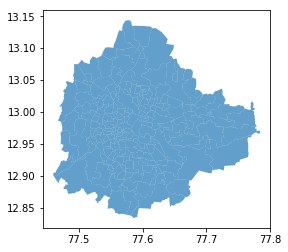

In [5]:
wards.plot(alpha=0.7)

In [6]:
schools = pd.read_csv(DATA/'bangalore/bangalore/Education/Bangalore_schools.csv', delimiter="|", skiprows=[1])

In [7]:
schools.rename(columns={'latlong                  ': 'coords'}, inplace=True)
schools = schools[schools.coords.notnull()]

In [8]:
from shapely import wkt
schools['coords'] = schools.coords.apply(wkt.loads)
schools = gpd.GeoDataFrame(schools, geometry='coords')

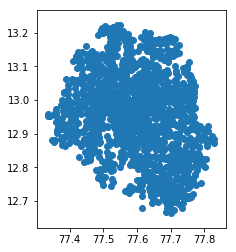

In [9]:
schools.plot()

In [10]:
schools.head()

,district,block,cluster,schoolid,schoolname,category,gender,medium_of_inst,address,area,pincode,landmark,identification1,busroutes,identification2,coords
0,bangalore,south-1,vajara halli,32868.0,GKHPS ALAHALLI,Upper Primary,co-ed,kannada,avalahalli south range- 1,bangalore,560062,masjid,NaN,NaN,NaN,POINT (77.57666 12.88930)
1,bangalore,north-4,yelehanka new town,32894.0,GKLPS RAMAGONDANAHALLI,Lower Primary,co-ed,kannada,NaN,NaN,560064,near ramgondahallibus stop,NaN,NaN,NaN,POINT (77.57558 13.11242)
2,bangalore,north-1,madanayakanahalli,33292.0,GKHPS SRIKANTAPURA,Upper Primary,co-ed,kannada,NaN,bangalore,560073,opposite oxford public school,NaN,NaN,NaN,POINT (77.48059 13.05316)
3,bangalore,south-2,chamarajpet,32136.0,GTHPS BELIMUTT,Upper Primary,co-ed,tamil,belimutt road bangalore- 53,bangalore,560053,bakshigarden arch near super talkies,NaN,NaN,NaN,POINT (77.57002 12.96642)
4,bangalore,anekal,chikkahosahalli,32514.0,GKHPS INDILWADI,Upper Primary,co-ed,kannada,"Indalwadi Post, Anekal Thaluk, Kasab Hobli",Indalwadi,562107,Opp Indalwadi Bus Stop,Cream Colour Compound,KSRTC,Cream Colour Building & Play Ground,POINT (77.63877 12.72840)


In [11]:
wards.head()

,OBJECTID,ASS_CONST_,ASS_CONST1,WARD_NO,WARD_NAME,POP_M,POP_F,POP_SC,POP_ST,POP_TOTAL,AREA_SQ_KM,LAT,LON,RESERVATIO,geometry
0,1,150,Yelahanka,2.0,Chowdeswari Ward,10402.0,9224.0,2630.0,286.0,19626.0,7.06,13.121709,77.580422,General,"POLYGON ((77.59229 13.09720, 77.59094 13.09842..."
1,2,150,Yelahanka,3.0,Atturu,13129.0,10891.0,2921.0,665.0,24020.0,10.15,13.102805,77.560038,General (Women),"POLYGON ((77.56862 13.12705, 77.57064 13.12654..."
2,3,150,Yelahanka,4.0,Yelahanka Satellite Town,13457.0,12325.0,3687.0,601.0,25782.0,4.90,13.090987,77.583925,Backward Category - A,"POLYGON ((77.59094 13.09842, 77.59229 13.09720..."
3,4,151,K.R. Puram,51.0,Vijnanapura,18118.0,16969.0,6454.0,228.0,35087.0,2.05,13.006063,77.669565,Scheduled Caste,"POLYGON ((77.67683 13.01147, 77.67695 13.01149..."
4,5,151,K.R. Puram,53.0,Basavanapura,11494.0,10518.0,4115.0,325.0,22012.0,6.28,13.016847,77.715456,General,"POLYGON ((77.72899 13.02061, 77.72994 13.01995..."


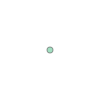

In [14]:
schools.geometry[0]

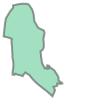

In [15]:
wards.geometry[0]

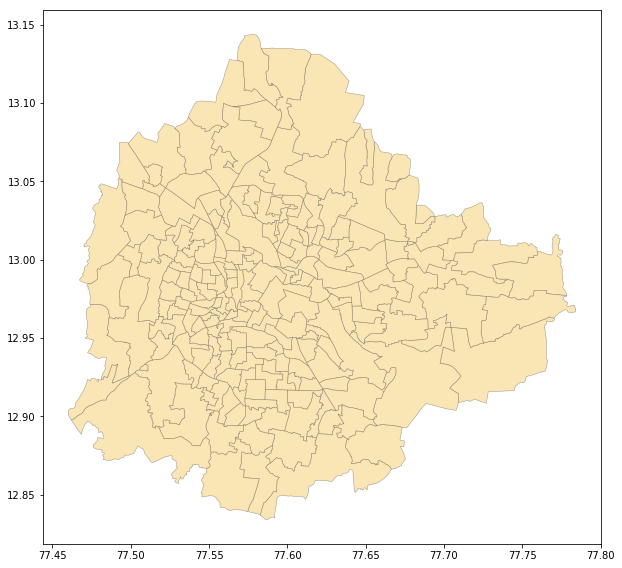

In [23]:
wards.plot(figsize=(10,10), facecolor="#F9DA95", edgecolor="#787064", linewidth=0.5, alpha=0.7)

In [25]:
wards.head()

,OBJECTID,ASS_CONST_,ASS_CONST1,WARD_NO,WARD_NAME,POP_M,POP_F,POP_SC,POP_ST,POP_TOTAL,AREA_SQ_KM,LAT,LON,RESERVATIO,geometry
0,1,150,Yelahanka,2.0,Chowdeswari Ward,10402.0,9224.0,2630.0,286.0,19626.0,7.06,13.121709,77.580422,General,"POLYGON ((77.59229 13.09720, 77.59094 13.09842..."
1,2,150,Yelahanka,3.0,Atturu,13129.0,10891.0,2921.0,665.0,24020.0,10.15,13.102805,77.560038,General (Women),"POLYGON ((77.56862 13.12705, 77.57064 13.12654..."
2,3,150,Yelahanka,4.0,Yelahanka Satellite Town,13457.0,12325.0,3687.0,601.0,25782.0,4.90,13.090987,77.583925,Backward Category - A,"POLYGON ((77.59094 13.09842, 77.59229 13.09720..."
3,4,151,K.R. Puram,51.0,Vijnanapura,18118.0,16969.0,6454.0,228.0,35087.0,2.05,13.006063,77.669565,Scheduled Caste,"POLYGON ((77.67683 13.01147, 77.67695 13.01149..."
4,5,151,K.R. Puram,53.0,Basavanapura,11494.0,10518.0,4115.0,325.0,22012.0,6.28,13.016847,77.715456,General,"POLYGON ((77.72899 13.02061, 77.72994 13.01995..."


In [28]:
wards_agg = wards[['ASS_CONST1', 'POP_TOTAL', 'AREA_SQ_KM', 'geometry']].dissolve(by='ASS_CONST1', aggfunc='sum').reset_index()
wards_agg.head()

,ASS_CONST1,geometry,POP_TOTAL,AREA_SQ_KM
0,B.T.M. Layout,"POLYGON ((77.62274 12.91731, 77.62233 12.91617...",252301.0,14.76
1,Bangalore South,"POLYGON ((77.58969 12.87720, 77.58966 12.87686...",156441.0,56.54
2,Basavanagudi,"POLYGON ((77.55332 12.92393, 77.55293 12.92406...",212308.0,34540.84
3,Bommana Halli,"POLYGON ((77.59995 12.86730, 77.59995 12.86748...",212271.0,38.77
4,Byatarayanapura,"POLYGON ((77.59033 13.04283, 77.59033 13.04283...",164472.0,68.92


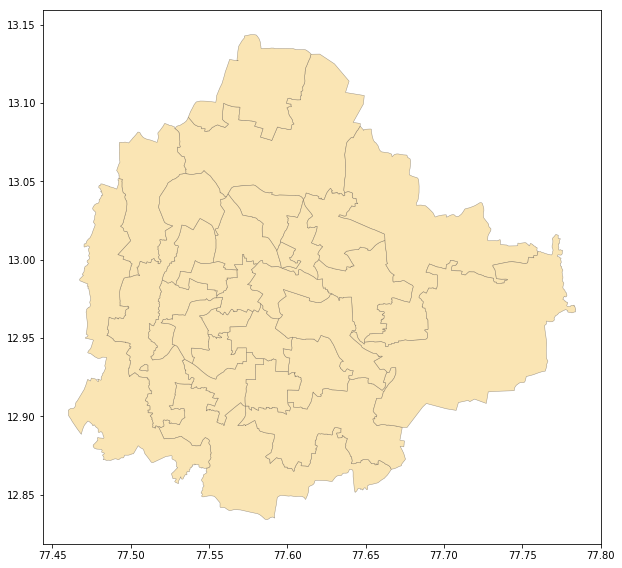

In [29]:
wards_agg.plot(figsize=(10,10), facecolor="#F9DA95", edgecolor="#787064", linewidth=0.5, alpha=0.7)

In [39]:
schools.crs = wards_agg.crs
print(schools.crs)

{'init': 'epsg:4326'}


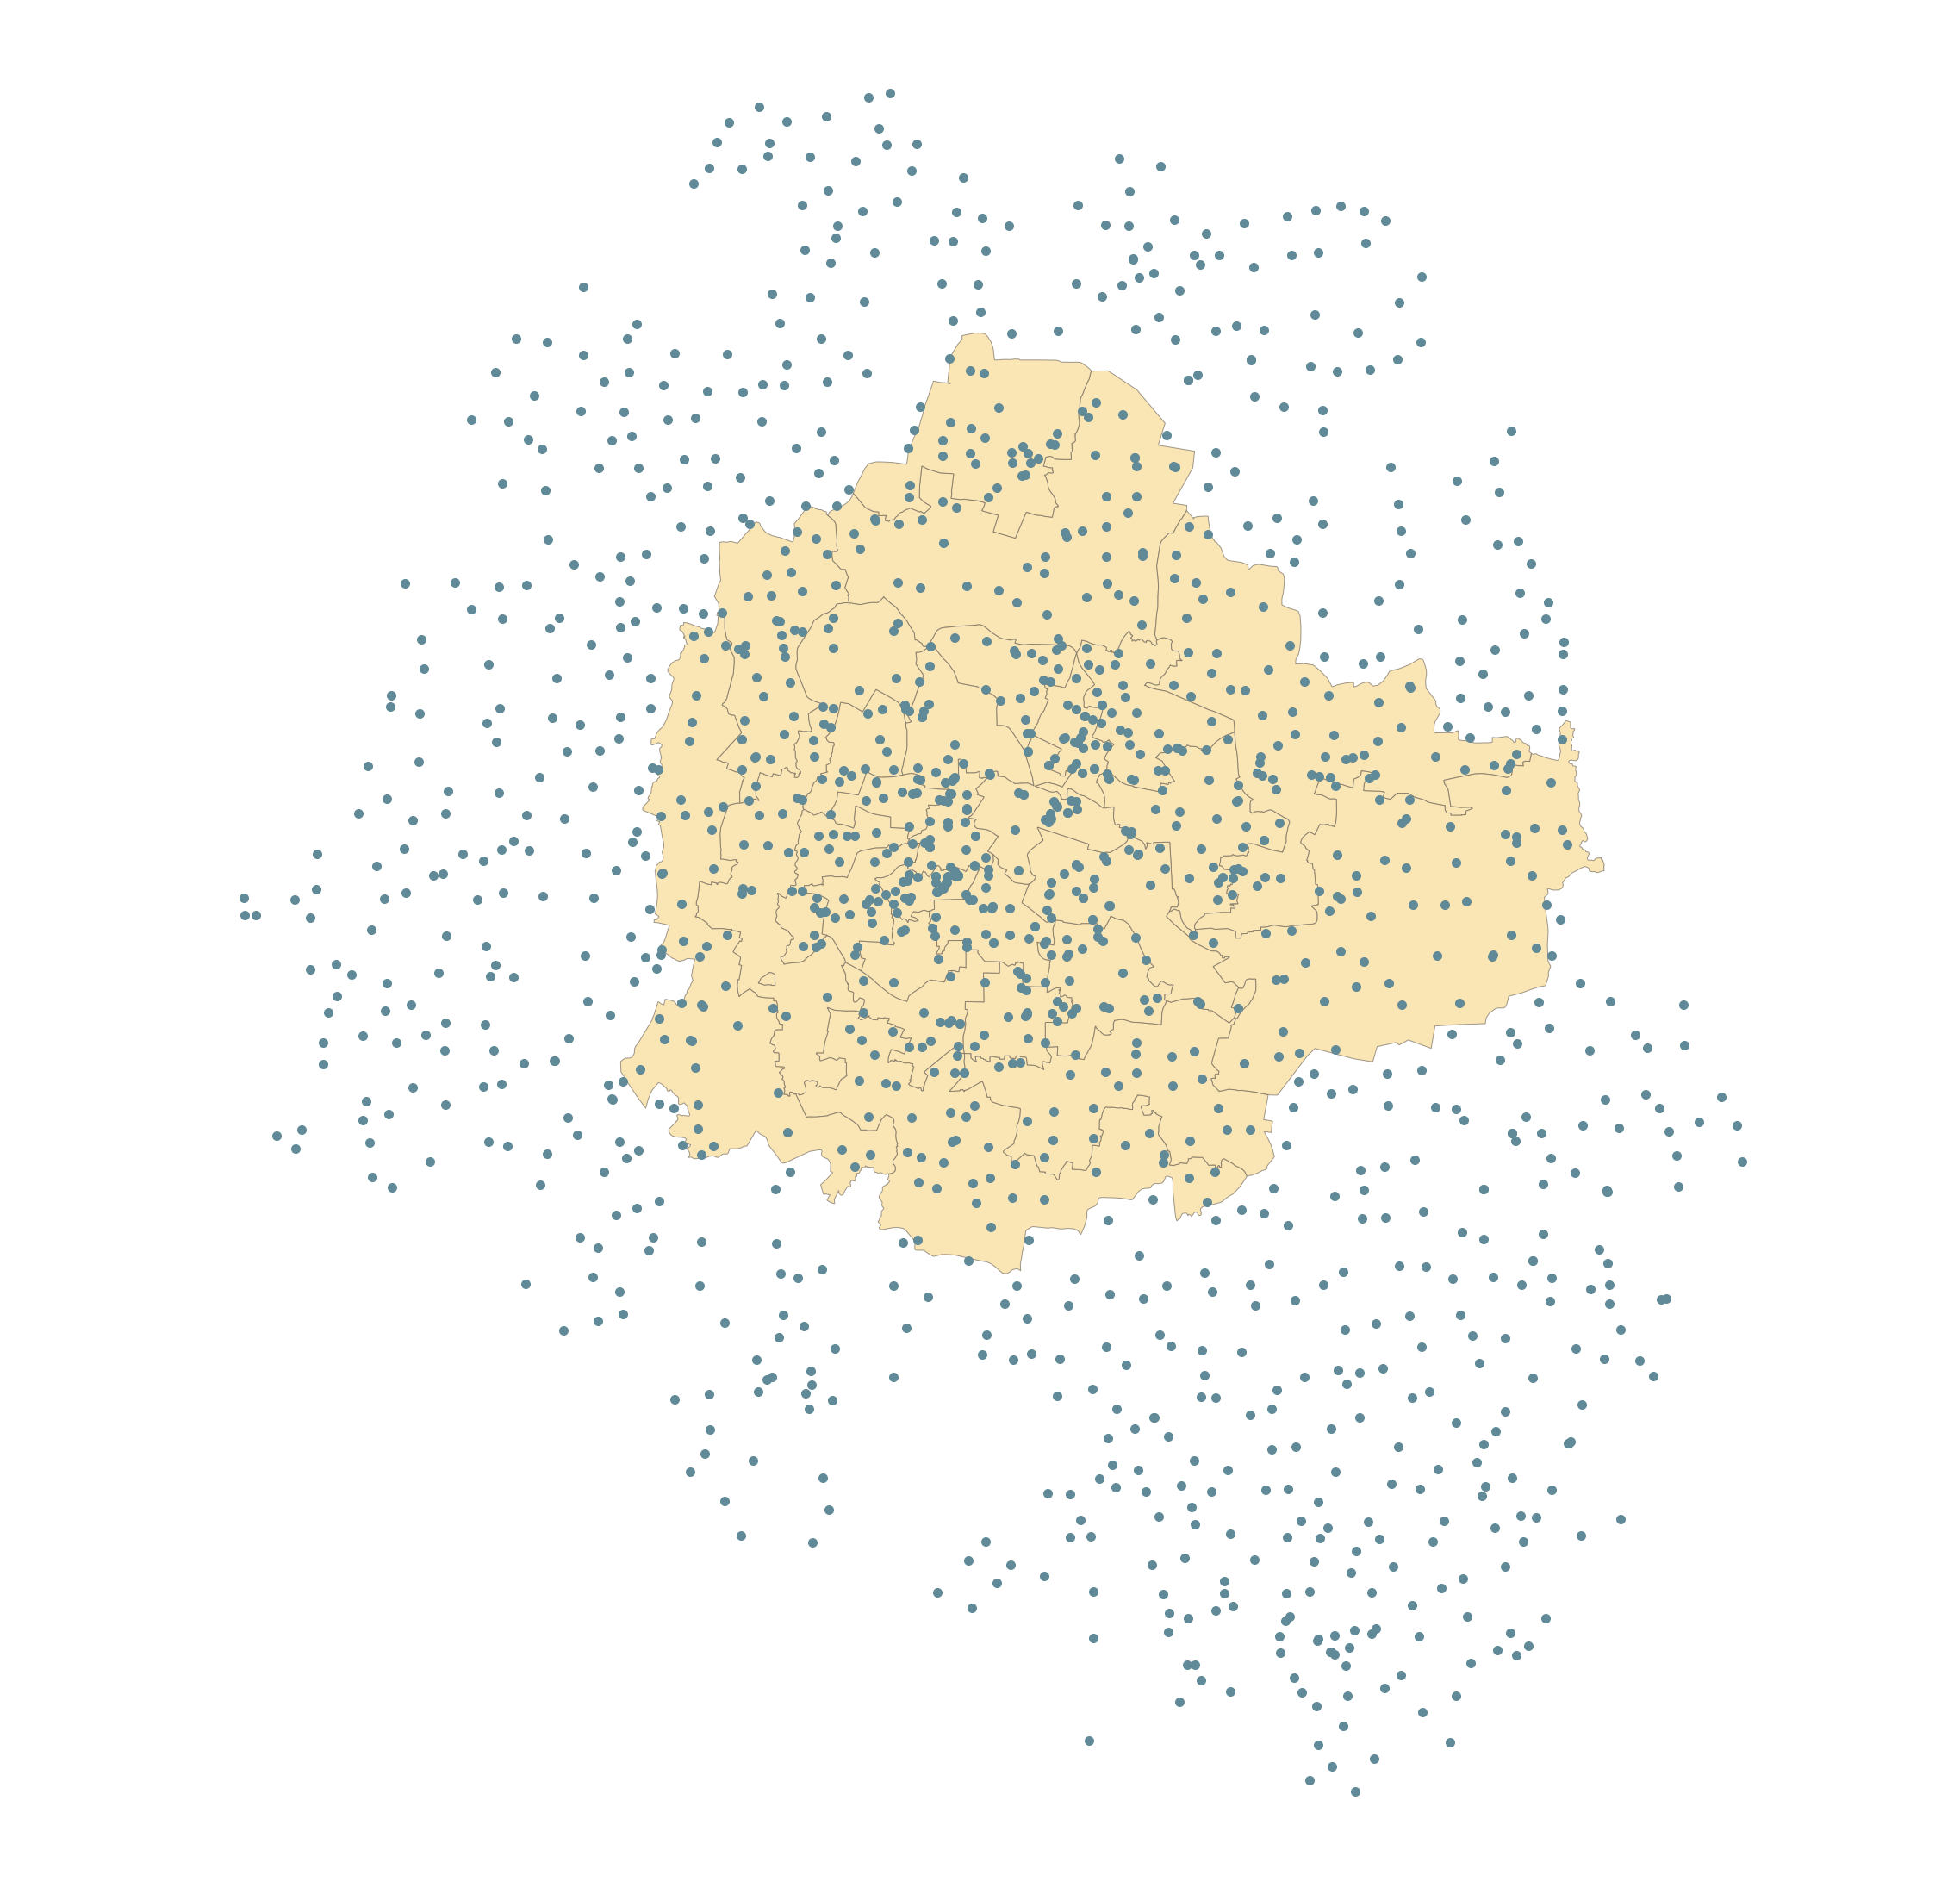

In [40]:
f,ax = plt.subplots(1, figsize=(40,40))

wards_agg.plot(ax=ax, facecolor="#F9DA95", edgecolor="#787064", linewidth=1, alpha=0.7)
schools.plot(ax=ax, color="#618A98", markersize=100)
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [44]:
school_in_wards = gpd.sjoin(schools[['schoolid', 'coords']], wards_agg, op='within')

In [49]:
school_in_wards.tail(20)

,schoolid,coords,index_right,ASS_CONST1,POP_TOTAL,AREA_SQ_KM
887,32971.0,POINT (77.59430 12.91155),12,Jaya Nagar,206755.0,9.29
891,32140.0,POINT (77.60202 12.91962),12,Jaya Nagar,206755.0,9.29
1037,32139.0,POINT (77.60393 12.92381),12,Jaya Nagar,206755.0,9.29
1038,33110.0,POINT (77.59375 12.92739),12,Jaya Nagar,206755.0,9.29
1039,33107.0,POINT (77.59081 12.93351),12,Jaya Nagar,206755.0,9.29
1329,32979.0,POINT (77.57975 12.91249),12,Jaya Nagar,206755.0,9.29
1379,32138.0,POINT (77.60389 12.91705),12,Jaya Nagar,206755.0,9.29
409,32976.0,POINT (77.56896 12.91746),17,Padmanaba Nagar,228620.0,10.62
544,32816.0,POINT (77.55927 12.90878),17,Padmanaba Nagar,228620.0,10.62
621,32740.0,POINT (77.53987 12.93051),17,Padmanaba Nagar,228620.0,10.62


In [63]:
num_schools = school_in_wards.groupby('ASS_CONST1').size().to_frame().reset_index()
num_schools.rename(columns={0: 'num_schools'}, inplace=True)
num_schools

,ASS_CONST1,num_schools
0,B.T.M. Layout,20
1,Bangalore South,39
2,Basavanagudi,6
3,Bommana Halli,27
4,Byatarayanapura,44
5,C.V. Ramannagar (SC),28
6,Chamarajpet,30
7,Chickpet,24
8,Dasarahalli,32
9,Gandhi Nagar,23


In [64]:
wards_agg = pd.merge(wards_agg, num_schools, on='ASS_CONST1')

In [65]:
wards_agg.head()

,ASS_CONST1,geometry,POP_TOTAL,AREA_SQ_KM,0,num_schools
0,B.T.M. Layout,"POLYGON ((77.62274 12.91731, 77.62233 12.91617...",252301.0,14.76,20,20
1,Bangalore South,"POLYGON ((77.58969 12.87720, 77.58966 12.87686...",156441.0,56.54,39,39
2,Basavanagudi,"POLYGON ((77.55332 12.92393, 77.55293 12.92406...",212308.0,34540.84,6,6
3,Bommana Halli,"POLYGON ((77.59995 12.86730, 77.59995 12.86748...",212271.0,38.77,27,27
4,Byatarayanapura,"POLYGON ((77.59033 13.04283, 77.59033 13.04283...",164472.0,68.92,44,44


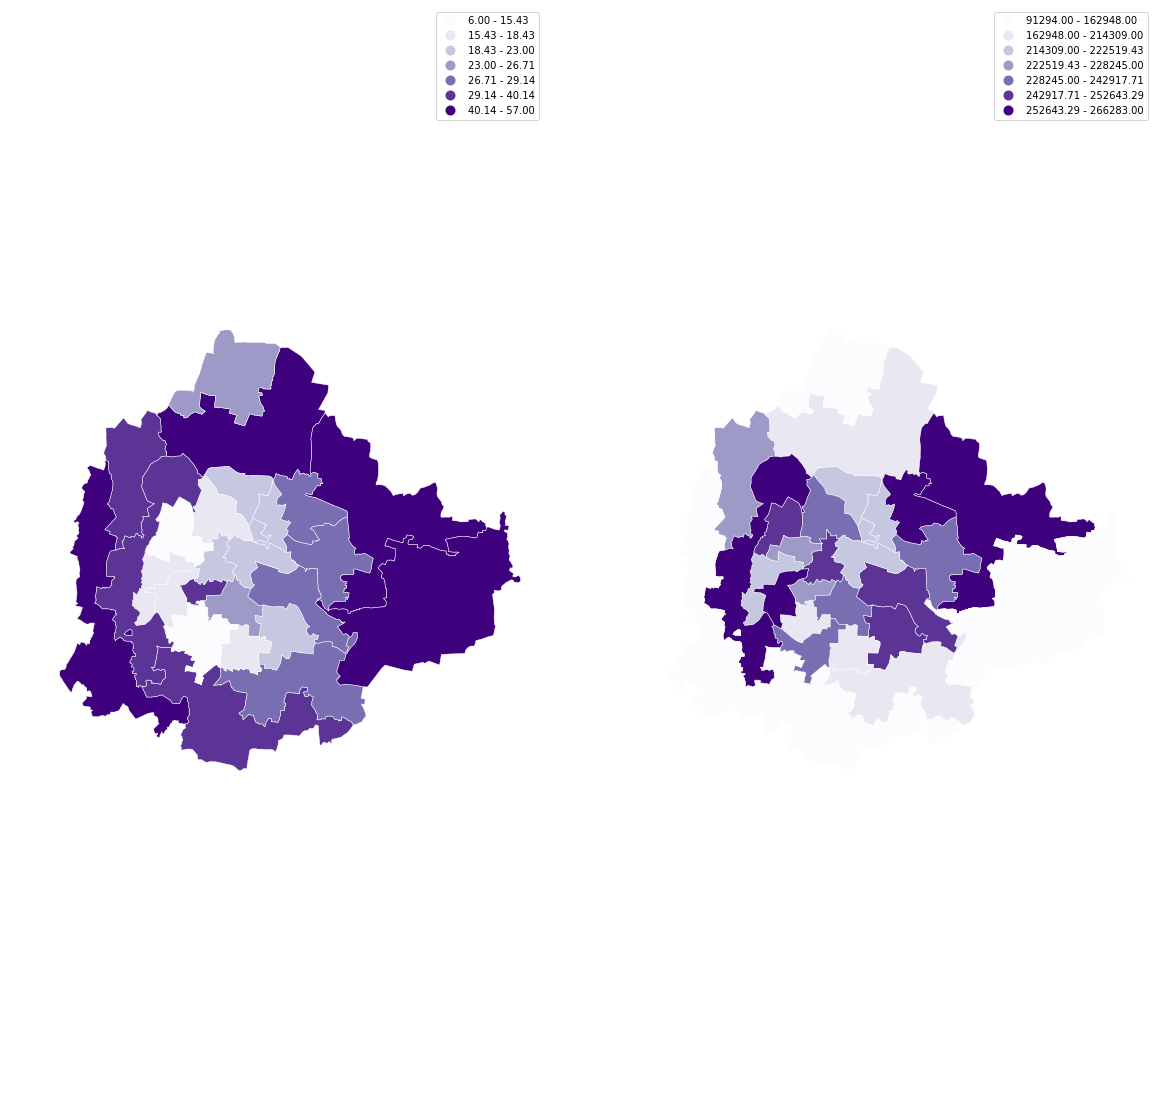

In [105]:
f,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,20))


wards_agg.plot(ax=ax1, column='num_schools', scheme='quantiles', k=7, legend=True, cmap='Purples', edgecolor='w', linewidth=0.5)
wards_agg.plot(ax=ax2, column='POP_TOTAL', scheme='quantiles', k=7, legend=True, cmap='Purples', edgecolor='w', linewidth=0.5)

ax1.set_axis_off()
ax2.set_axis_off()

ax1.axis('equal')
ax2.axis('equal')

plt.show()

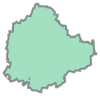

In [106]:
# BBMP ward
wards.geometry.unary_union